In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [4]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


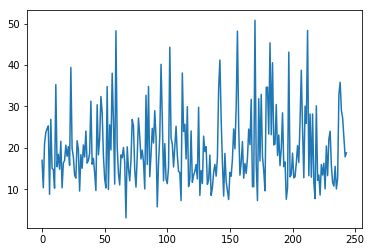

In [6]:
plt.plot(tips['total_bill'])

In [7]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [9]:
data = tips

In [11]:
def assigning_categorical(data, column):
    categories = []
    for i in data[column].unique():
        categories.append(i)
    try:    
        categories.remove(np.nan)
    except Exception as e:
        pass
    data[column+'_new'] = pd.Categorical(data[column], categories=categories, ordered=True).codes
    data.drop(f'{column}', axis=1, inplace = True)
    data.replace(-1, np.nan, inplace=True)

In [12]:
for i in data.columns:
    if data[i].dtype == 'O':
        try:
            assigning_categorical(data, i)
        except Exception as e:
            pass

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
size          244 non-null int64
sex_new       244 non-null int8
smoker_new    244 non-null int8
day_new       244 non-null int8
time_new      244 non-null int8
dtypes: float64(2), int64(1), int8(4)
memory usage: 6.8 KB


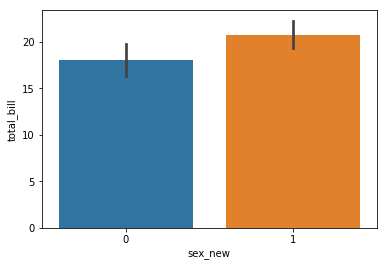

In [14]:
sb.barplot(x='sex_new',y='total_bill',data=data)

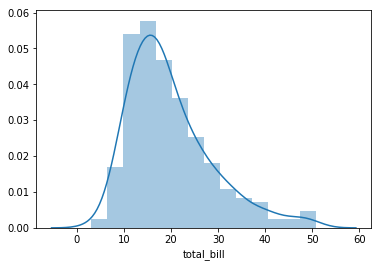

In [15]:
sb.distplot(data['total_bill'])

### displot of totalbill shows that most of the bills lies between 5-35

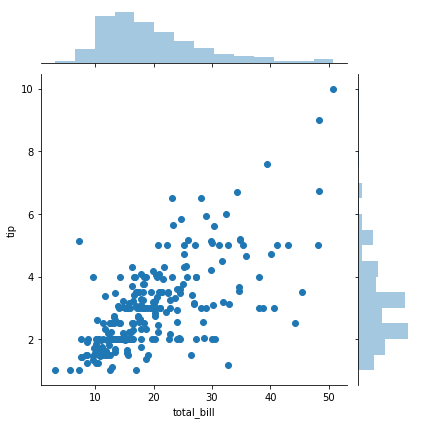

In [16]:
sb.jointplot(x='total_bill',y='tip',data=data)

####  most of the tips given by the customers is 1-5 dolars and the tip amount is more in the case of bill is more

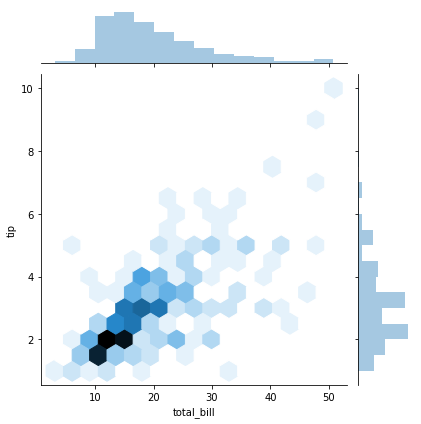

In [17]:
sb.jointplot(x='total_bill',y='tip',data=data,kind='hex')

In [18]:
#### jointplot with kind 'hex' will show the where the tip is more dence

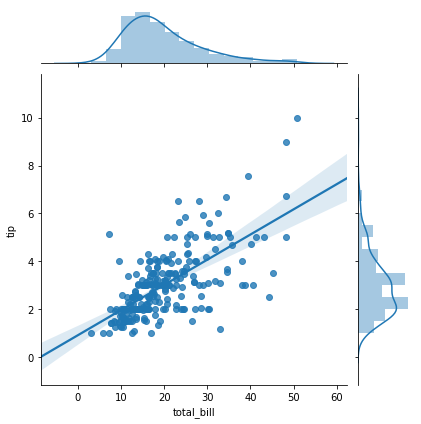

In [19]:
sb.jointplot(x='total_bill',y='tip',data=data,kind='reg')

#### jointplot with kind 'reg' will show the linear increase with increase with bill

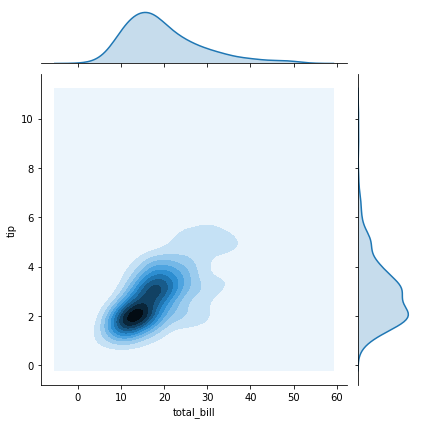

In [20]:
sb.jointplot(x='total_bill',y='tip',data=data,kind='kde')

#### darker the region more number of tip given

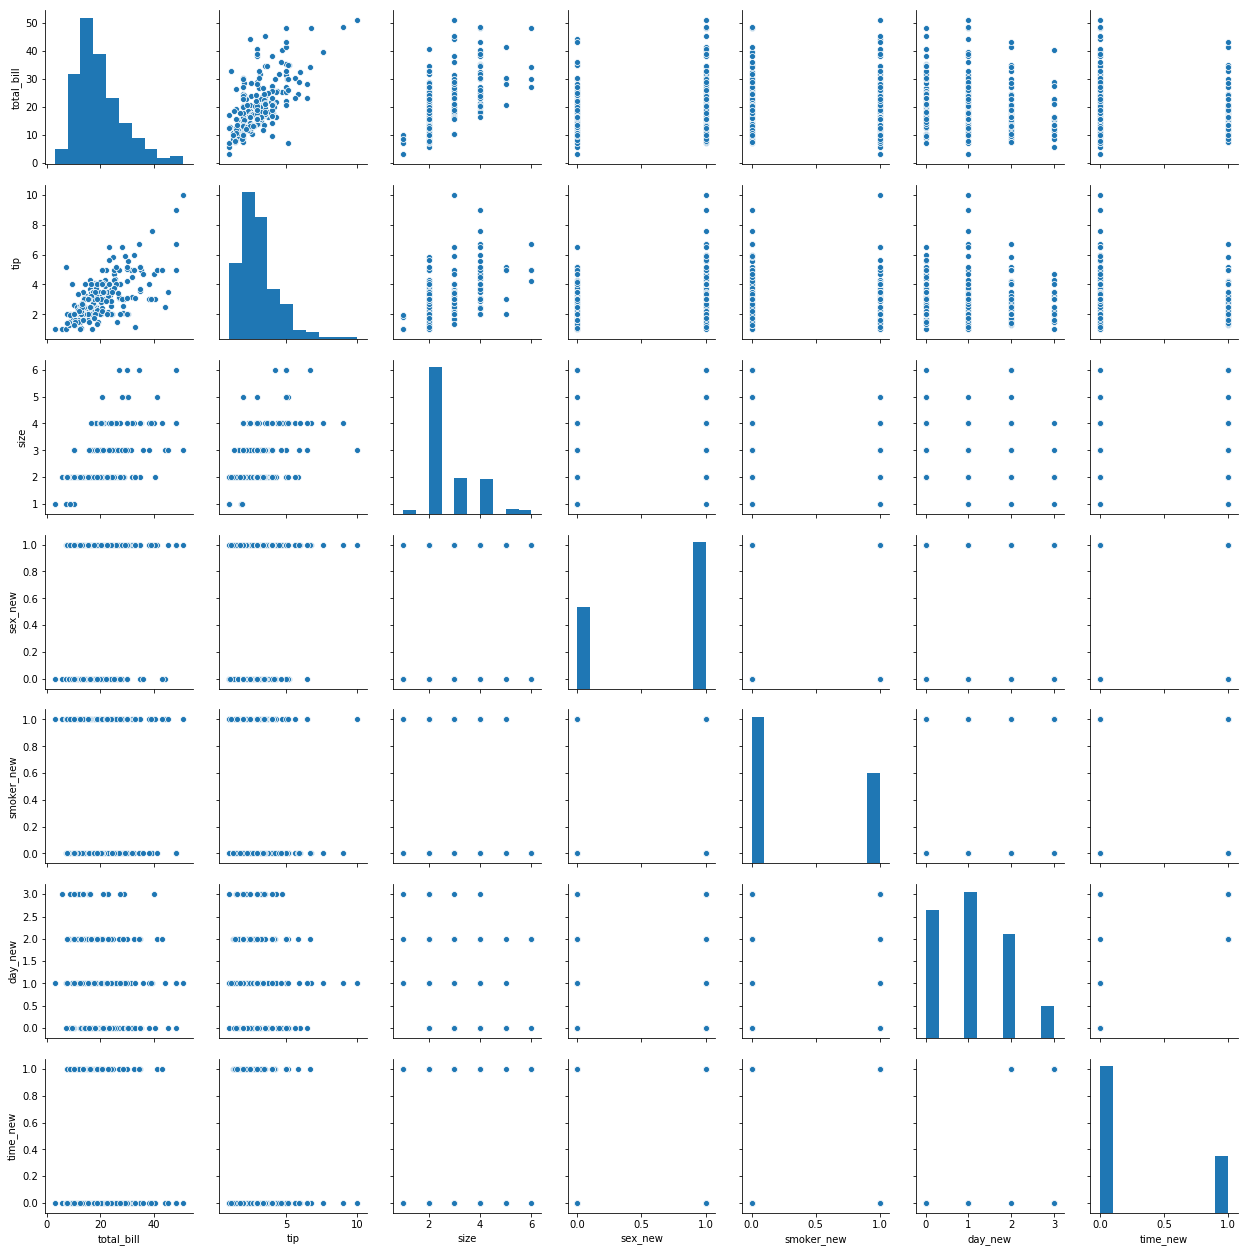

In [21]:
sb.pairplot(data)

### by using the pairplot we can each  column depend , independent to another column

/home/vasim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/vasim/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


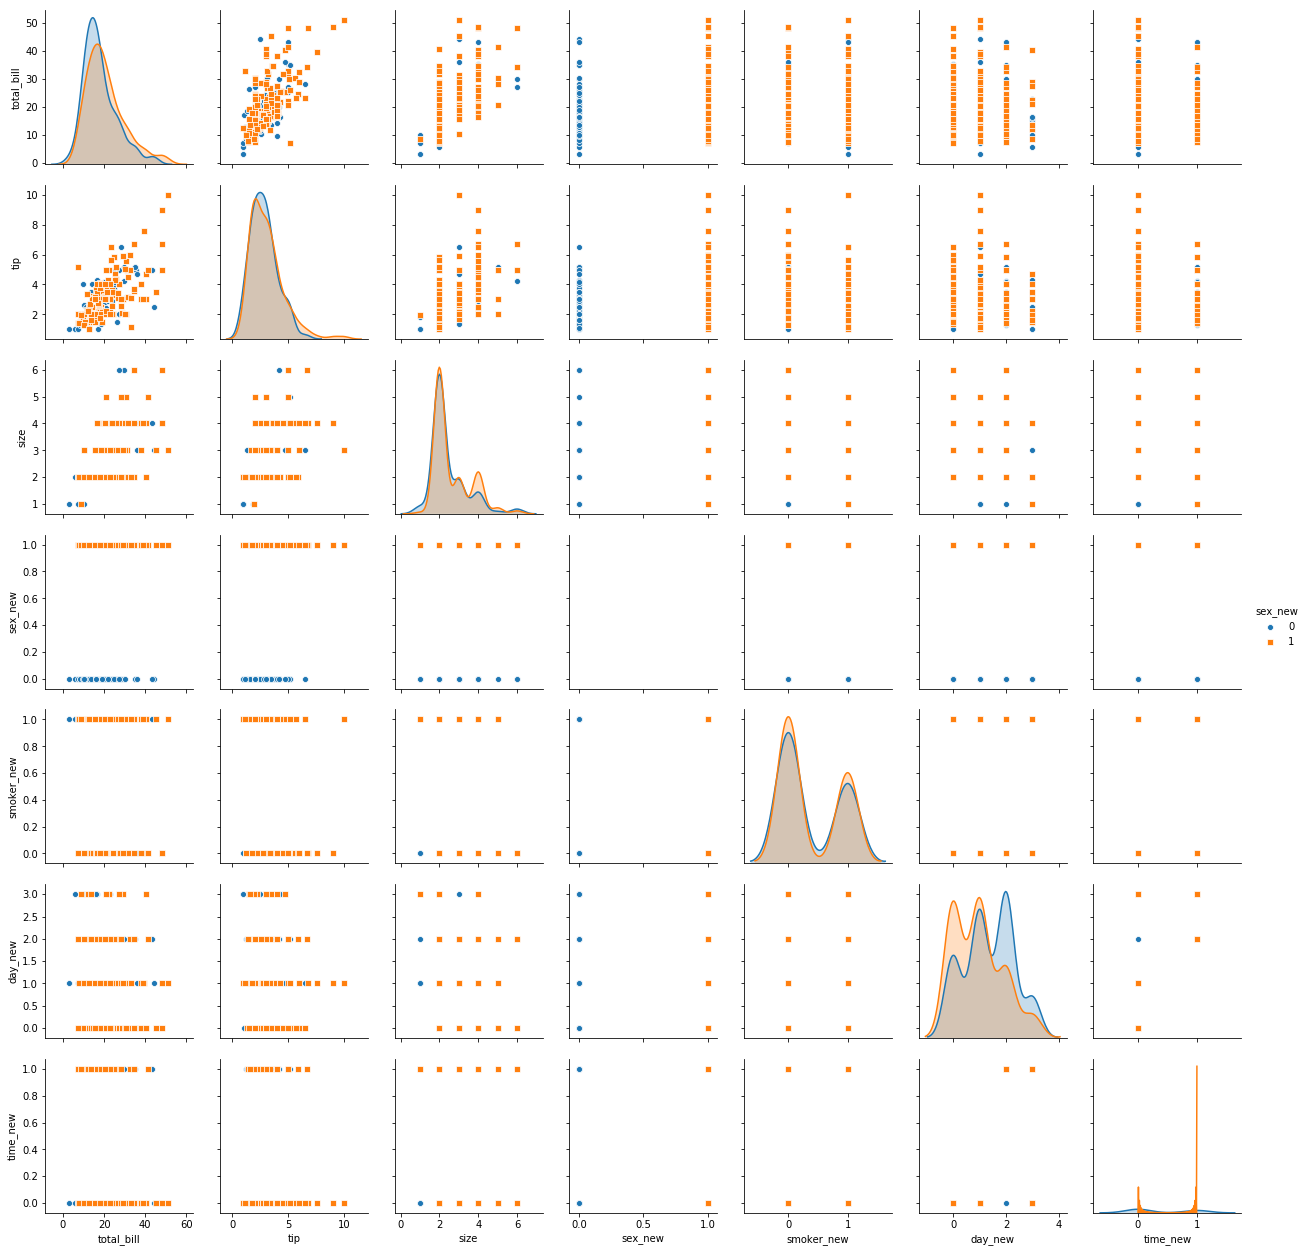

In [22]:
sb.pairplot(data,hue='sex_new',markers=['o','s'])

#### hue will helps us to get a plot with respect to a catagory

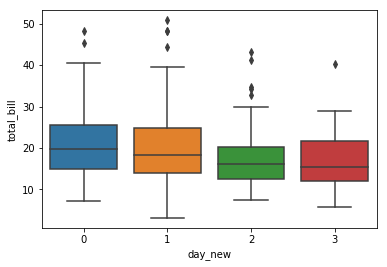

In [23]:
sb.boxplot(x='day_new',y='total_bill',data=data)

#### boxplot will show the more sales in the week

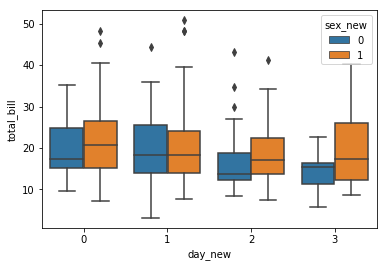

In [24]:
sb.boxplot(x='day_new',y='total_bill',data=data,hue='sex_new')

#### geting the sales deatils with respect to a perticular catagory